In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set the UniswapV3 API endpoint
api_endpoint = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3"

# Define the pool address
pool_address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"

In [2]:
start_date = "2023-01-01T00:00:00Z"
end_date = "2023-02-01T00:00:00Z"

In [3]:
import datetime

# Create a datetime object for January 1st, 2023 at 00:00:00
dt = datetime.datetime(2023, 1, 1, 0, 0, 0)

# Convert the datetime object to a Unix timestamp
unix_timestamp = dt.timestamp()

print(unix_timestamp)

1672531200.0


In [14]:
query = """
    query {
        pool(id: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8") {
            id
            token0 {
                symbol
            }
            token1 {
                symbol
            }
            poolDayData(where: { date_gte: 1609459200, date_lt: 1672531200}, orderBy: date, orderDirection: asc) {
                date
                liquidity
                volumeUSD
            }
        }
    }
"""

In [12]:
query = """
    query {
        pool(id: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8") {
            id
            token0 {
                symbol
            }
            token1 {
                symbol
            }
            poolDayData(last: 100, orderBy: date, orderDirection: desc) {
                date
                liquidity
                volumeUSD
                feesUSD
                tvlUSD
            }
        }
    }
"""

In [9]:
query = """
    query {
        pools(first: 100, where: {id: "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"}, orderBy: date, orderDirection: desc) {
            totalValueLockedUSD
            poolDayData(last: 100, orderBy: date, orderDirection: desc) {
                date
                liquidity
                volumeUSD
                feesUSD
            }
        }
    }
"""

In [13]:
# Send the query to the API endpoint
response = requests.post(api_endpoint, json={'query': query})

# Parse the JSON response into a Pandas DataFrame
data = response.json()['data']['pool']['poolDayData']
df = pd.DataFrame(data)

In [14]:
df

,date,liquidity,volumeUSD,feesUSD,tvlUSD
0,1682985600,7279866975642489619,6037187.884100402269308306205911938,18111.56365230120680792491861773583,290403504.9616863542862465525025965
1,1682899200,7220734490109797848,14140425.95513897076379369564524961,42421.27786541691229138108693574879,288007933.2925995004842737960600978
2,1682812800,7279102075318241452,9371884.813540433213459162283105513,28115.65444062129964037748684931656,291450522.5628793971914611025625889
3,1682726400,5118329759048463657,3733410.316040927300509250033059306,11200.23094812278190152775009917792,292719105.7722799675003286910875742
4,1682640000,7365587467589615296,7228088.089207720376338250356776469,21684.26426762316112901475107032941,292650512.7321434084587058926323669
...,...,...,...,...,...
95,1674777600,10151729045194677103,26145103.96726044624750623496438947,78435.31190178133874251870489316826,338358930.9581053036842048707886787
96,1674691200,10176655944895516423,21204062.67350632099263540473294597,63612.18802051896297790621419883798,338015089.2016388605394361206425116
97,1674604800,10149958524662789200,58430951.10370445942251488278338983,175292.8533111133782675446483501697,340372229.4405743472023949552221865
98,1674518400,10566066165445661716,26711293.81824786684016589045146515,80133.88145474360052049767135439546,336657374.7427631800564861096078861


In [18]:
# Convert the date column to a datetime object and set it as the index
df['date'] = pd.to_datetime(df['date'], unit='s')
df.set_index('date', inplace=True)

In [19]:
df['volumeUSD'] = pd.to_numeric(df["volumeUSD"])
df['feesUSD'] = pd.to_numeric(df["feesUSD"])
df['tvlUSD'] = pd.to_numeric(df["tvlUSD"])

#df['liquidity'] = pd.to_numeric(df['liquidity'])


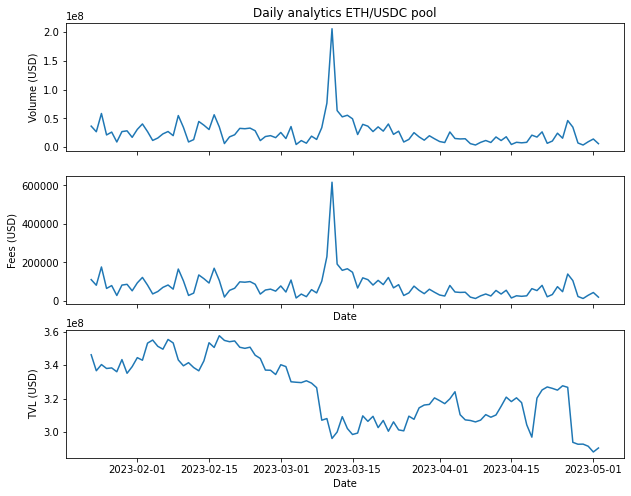

In [21]:
# Plot the daily volume over time

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))

# Plot the daily volume over time
ax1.plot(df.index, df['volumeUSD'])
ax1.set_ylabel("Volume (USD)")
ax1.set_title("Daily analytics ETH/USDC pool".format(pool_address))

# Plot the liquidity over time
ax2.plot(df.index, df['feesUSD'])
ax2.set_ylabel("Fees (USD)")
ax2.set_xlabel("Date")

# Plot the liquidity over time
ax3.plot(df.index, df['tvlUSD'])
ax3.set_ylabel("TVL (USD)")
ax3.set_xlabel("Date")

# Display the plot
plt.show()



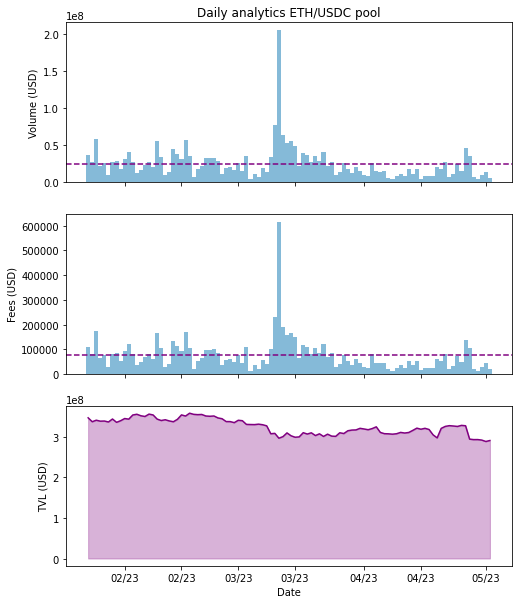

In [47]:
# Plot the daily volume over time
import matplotlib.dates as mdates
# Create a figure with two subplots
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8,10))

colors = ['#a6bddb','#67a9cf','#1c9099', "ffb6c1"]


# Plot the daily volume over time
axs[0].bar(df.index, df['volumeUSD'], width = 1, color=colors[1], alpha=0.8)
axs[0].axhline(y=df['volumeUSD'].mean(), color='purple', linestyle='--', label='Mean')
axs[0].set_title('Daily analytics ETH/USDC pool')
axs[0].set_ylabel('Volume (USD)')



axs[1].bar(df.index, df['feesUSD'], width = 1, color=colors[1], alpha=0.8)
axs[1].axhline(y=df['feesUSD'].mean(), color='purple', linestyle='--', label='Mean')
axs[1].set_ylabel('Fees (USD)')



axs[2].plot(df.index, df['tvlUSD'], color = "purple")
axs[2].fill_between(df.index, df["tvlUSD"], color = 'purple', alpha = 0.3)
axs[2].set_ylabel('TVL (USD)')
axs[2].set_xlabel("Date")


# Format the x-axis tick labels as month/day
date_fmt = '%m/%y'
date_formatter = plt.matplotlib.dates.DateFormatter(date_fmt)
axs[2].xaxis.set_major_formatter(date_formatter)
# Display the plot
plt.show()